# Notebook #3: Analysis of the Response
- Response generated from a synthetic function
- Trials sampled with Definitive Screening design
- Analysis done using `statsmodels` Ordinary Least Squares (Linear Regression), by feeding the known function model 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import definitive_screening_design as dsd

import statsmodels.formula.api as smf # Need for `pip install statsmodels==0.13.5`.  This library is needed to perform the linear regression. 
import statsmodels.api as sm

In [2]:
def add_response(df, noise=5):
    """Generate a synthetic response for a numpy array with 6 factors."""
    x = (
        df
        .drop(columns="Response", errors='ignore')
        .to_numpy()
    )
    df['Response'] = sum([
        # Intercept
        20.0 * np.ones(shape=x.shape[0]),
        # Main Effects
        10.0 * x[:, 0], # X01
         8.0 * x[:, 1], # X02
         6.0 * x[:, 2], # X03
         0.0 * x[:, 3], # X04
         6.0 * x[:, 4], # C01
         0.0 * x[:, 5], # C02
        # 2-Interactions
         8.0 * x[:, 0] * x[:, 1],
        15.0 * x[:, 1] * x[:, 2],
        10.0 * x[:, 1] * x[:, 4],
        # Quadratic
         5.0 * x[:, 0] * x[:, 0],
        10.0 * x[:, 3] * x[:, 3],
        # Experimental error  
        np.random.normal(0, noise, size=x.shape[0])
    ]).round(1)

In [3]:
A = dsd.generate(n_num=4, n_cat=2, n_fake_factors=2) # Generate the Definitive Screening design (pd.DataFrame) - using 2 fake factors, i.e., 4 extra trials
A = A.replace({"A":0, "B":1}).astype("float")        # Replace the Categorical levels A and B with 0 and 1, and convert to float
add_response(A)                                      # Compute the synthetic response
A

Generating a Definitive Screening Design with 4 numerical and 2 categorical factors.


,X01,X02,X03,X04,C01,C02,Response
1,0.0,1.0,1.0,1.0,1.0,1.0,75.4
2,0.0,-1.0,-1.0,-1.0,0.0,0.0,32.7
3,1.0,0.0,-1.0,-1.0,1.0,1.0,43.5
4,-1.0,0.0,1.0,1.0,0.0,0.0,30.9
5,1.0,1.0,0.0,-1.0,0.0,1.0,64.9
6,-1.0,-1.0,0.0,1.0,1.0,0.0,21.6
7,1.0,1.0,1.0,0.0,1.0,0.0,84.8
8,-1.0,-1.0,-1.0,0.0,0.0,1.0,35.3
9,1.0,-1.0,1.0,1.0,0.0,1.0,19.3
10,-1.0,1.0,-1.0,-1.0,1.0,0.0,25.3


In [4]:
lrm = smf.ols( # NOTE that I'm feeding the known model from the synthetic function ... plus some other terms that I expect to be negligible for checking if the OLS fit correctly assign a high p-value to them!
            'Response ~ X01 + X02 + X03 + X04 + C01 + C02 + ' +
            'X01*X02 + X02*X03 + X02*C01 + X03*X04 + ' +
            'I(X01**2) + I(X03**2)', 
        data=A).fit()
lrm.summary()

/home/daniele/anaconda3/envs/base1/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     19.54
Date:                Tue, 24 Jan 2023   Prob (F-statistic):            0.00206
Time:                        21:07:17   Log-Likelihood:                -45.032
No. Observations:                  18   AIC:                             116.1
Df Residuals:                       5   BIC:                             127.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.3051      3.978      6.613      0.001      16.080      36.530
X01             7.2781      1.520      4.788      0.005       3.371      11.185
X02            11.4032      3.315      3.440      0.018       2.883      19.923
X03             4.7871      1.526      3.137      0.026       0.864       8.710
X04            -0.9014      1.526     -0.591      0.580      -4.824       3.021
C01             3.5434      2.749      1.289      0.254      -3.522      10.609
C02             2.9626      2.749      1.078      0.330      -4.103      10.029
X01:X02         6.2470      1.808      3.455      0.018       1.598      10.896
X02:X03        14.0720      1.808      7.782      0.001       9.423      18.721
X02:C01         4.6803      5.891      0.794      0.463     -10.463      19.824
X03:X04         3.2673      2.758      1.185      0.289      -3.823      10.358
I(X01 ** 2)     6.3268      4.202      1.506      0.193      -4.475      17.129
I(X03 ** 2)     1.3542      4.355      0.311      0.768      -9.841      12.549
==============================================================================
Omnibus:                        2.002   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                1.009
Skew:                           0.080   Prob(JB):                        0.604
Kurtosis:                       1.851   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> NOTE that `P>|t|` is significant for `X04` and `C02` that are indeed not influencing the synthetic Response, 
> but it struggle to recognize that `X03:X04` is non-influential too, giving it a p-value smaller or similar (depending on the random seed!) than the influential terms `X02:C01` and the quadratic terms.
> Indeed, we saw in the previous notebook that 2-interactions and quadratic terms are quite aliased: 
> we have better not to consider both for the model, or choose a larger design if we are sure they are both relevant. 

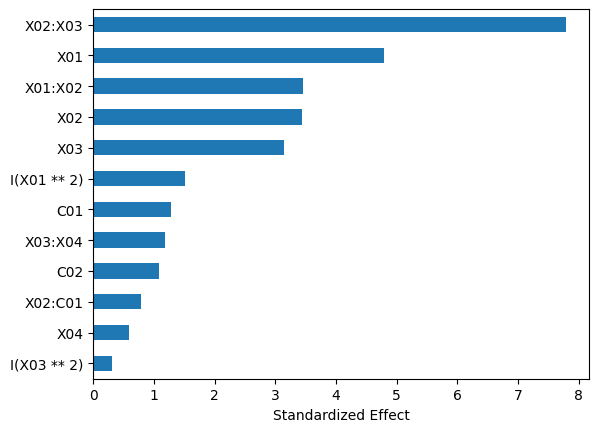

In [5]:
# Standardized effects
lrm.tvalues.abs().drop(['Intercept']).sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Standardized Effect")
plt.grid(False)
plt.show()

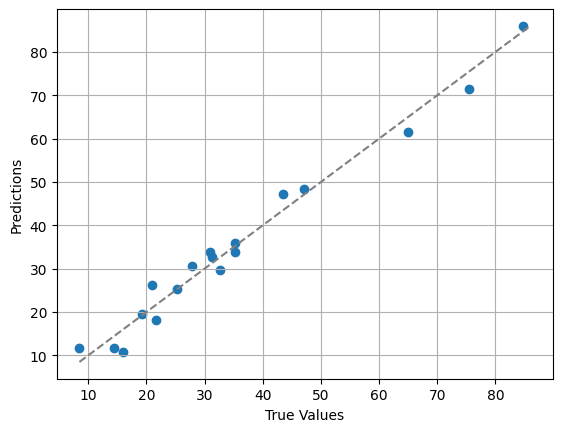

In [6]:
# Parity plot: True VS Predictions
predictions = lrm.predict()
allpoints = list(lrm.predict())+list(A['Response'])
minmaxval = [min(allpoints), max(allpoints)]

plt.scatter(A['Response'], predictions)
plt.plot(minmaxval, minmaxval, c='gray', ls='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

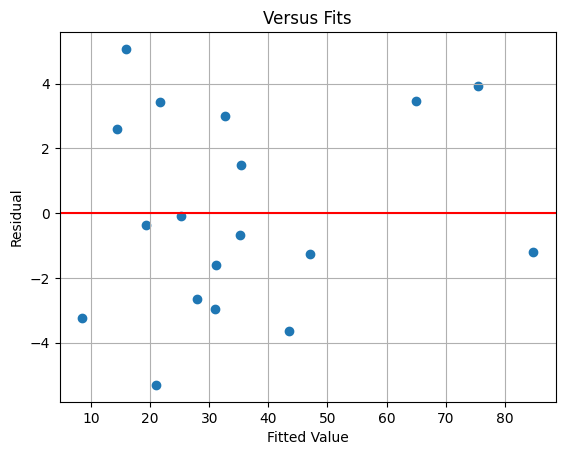

In [7]:
# Residuals VS Response value
plt.scatter(A['Response'], lrm.resid)
plt.axhline(0, c="red")
plt.title("Versus Fits")
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.grid()
plt.show()

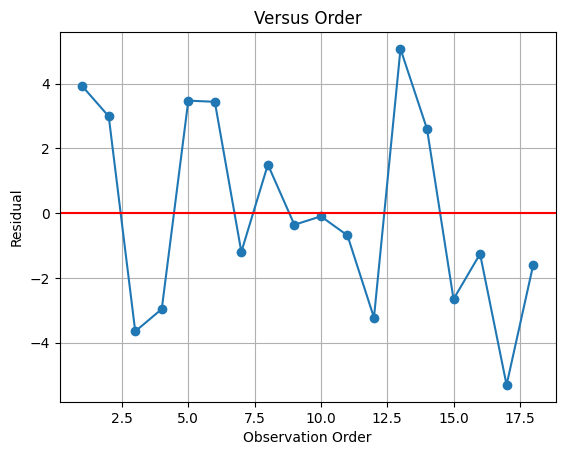

In [8]:
# Residuals VS Order of measurement
lrm.resid.plot(marker='o')
plt.axhline(0, c="red")
plt.title("Versus Order")
plt.xlabel('Observation Order')
plt.ylabel('Residual')
plt.grid()
plt.show()

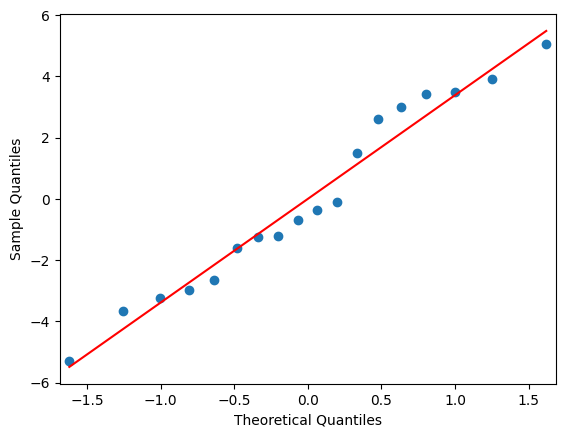

In [9]:
# Probability plot of residuals: to check if they are normally distributed
pplot = sm.ProbPlot(lrm.resid)
fig = pplot.qqplot(line='r')
plt.show()


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


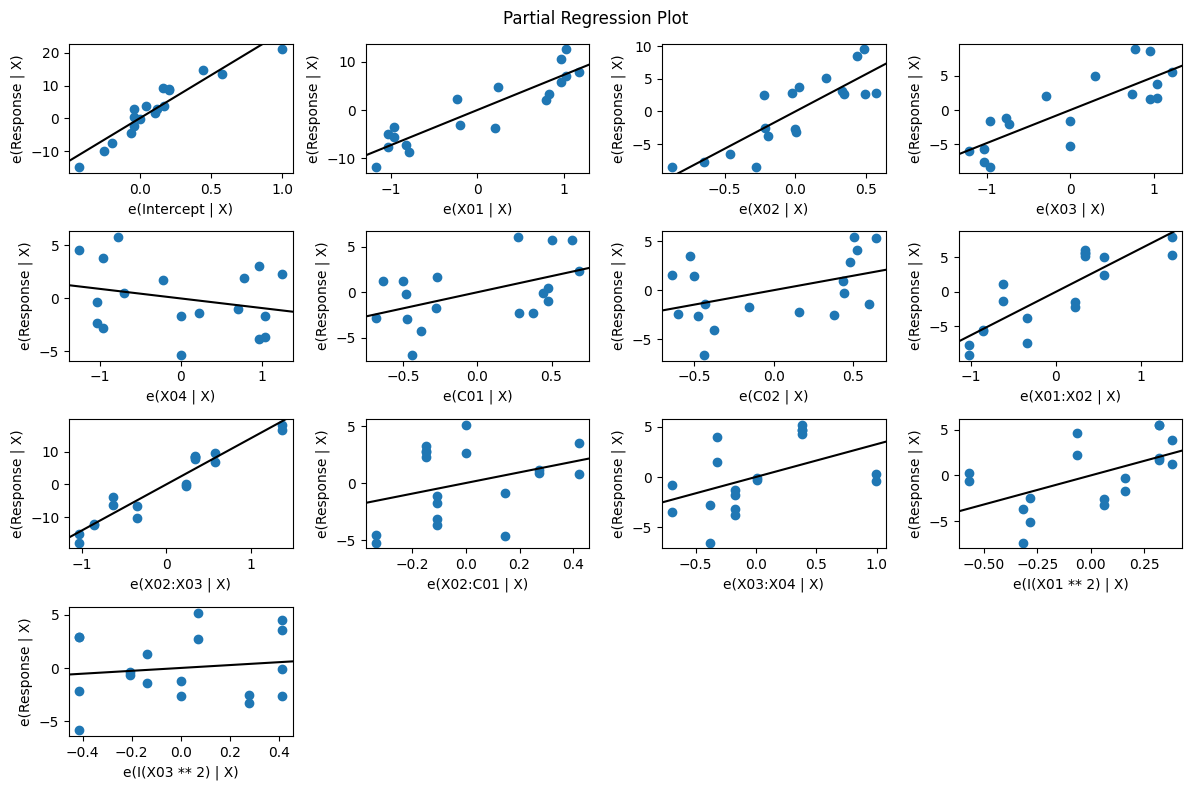

In [10]:
# Partial Regression Plot
fig = sm.graphics.plot_partregress_grid(lrm, grid=(4,4))
fig.set_size_inches(12, 8)
fig.tight_layout(pad=1.0)
plt.show()